

# Introduction
Hello!
This file is the description of the starting kit of the challenge (__put the name of the challenge__).

Here you can find an overview of a basic solution to run this challenge smoothly, from the start to the submission in Codalab.

First, you have to participate in the competition on CodaLab (__TODO__ here the link), then retrieve the provided data.
It should contain two images stacks, respectively *imagesTraining.tiff* and *imagesTest.tiff* and a *description_training.csv* file. You have to detect spots on the provided images stacks. The *descriptions_training.cvs* contains the true positions about the training images.

The *submission_sample.zip* is an example submission for the challenge in CodaLab. Your aim is to complete a similar file for the validation dataset, i.e. corresponding to the *imagesTest.tiff* file.

The structure of this notebook is:

```
.
├── Data
│   ├── imagesTest.tiff <- Validation dataset 
│   ├── imagesTraining.tiff <- Training dataset 
│   └── descriptions_training.csv <- The truth labels of the training dataset
├── startingkit_challenge.ipynb <- This notebook
└── submission_sample.zip <- An example submission
```



## Setup

First, usefull packages have to be imported:
- the `numpy` library is used to manipulate the data.
- the `tifffile` library is used to read .tiff images stack.
- the `matplotlib` library is used to draw and show the image in the algorithms.
- the `cvs` library is used to manipulate .csv descritpions files.
- the `random` library is used to generate random numbers.
- the `math` library is used for basic mathematical functions.

In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import csv
import time
import random
from math import *
random.seed(time.time())

## Loading the images

The following function allows reading a gray scale stack of images. 
Using filename, data are loaded and stored in a list.
Each element of the list represents an image.

In [2]:
# Load the images present in the .tiff file
## nameFile : the name of the stack to read in the Data folder
### return the images in a list
def readImages(nameFile):
	dataImages = []
	scan = []
	try:
		scan = tiff.imread("Data/"+nameFile) # load the images
	except:
		print "ERROR: file Data/" + nameFile + " not found!"
		return

	for element in range(len(scan)):
		image = scan[element, :,:,0] # Images are in gray scale
		dataImages.append(image)
        
	return dataImages

An image can be printed and displayed such as:

In [3]:
images = readImages("results.tiff")
print images[5]

[[79 77 78 78 79 77 75 76 75 75 73 73 73 73 74 72 72 72 73 74 73 74 72 70]
 [78 78 78 77 77 76 76 75 75 75 73 73 73 73 73 72 72 72 72 72 73 72 71 69]
 [78 77 78 78 76 76 76 75 75 74 73 74 73 73 72 71 73 74 72 69 71 70 70 68]
 [78 78 78 77 78 77 75 75 74 74 74 75 73 73 73 72 72 72 70 71 73 70 69 68]
 [78 79 77 78 78 77 74 75 75 75 74 72 73 73 73 72 71 71 71 72 72 70 68 68]
 [77 78 77 77 76 76 76 76 75 74 74 73 74 74 72 72 72 71 71 71 71 70 69 68]
 [77 77 77 77 75 76 77 77 76 75 75 74 72 73 72 72 72 71 70 69 69 69 70 69]
 [78 78 76 76 75 77 77 76 75 73 71 71 72 72 74 72 70 71 71 68 70 70 69 68]
 [79 78 78 75 75 77 76 75 73 68 62 59 61 67 72 72 71 71 71 70 70 71 69 69]
 [79 78 78 77 77 78 77 75 66 51 42 39 41 48 62 72 71 71 71 70 71 71 70 70]
 [78 77 79 77 76 76 76 71 51 39 34 33 34 38 47 64 70 72 72 71 71 69 70 69]
 [79 78 77 77 77 76 75 64 42 34 32 31 31 33 40 57 69 71 71 71 70 69 70 69]
 [78 78 76 77 77 76 73 60 41 34 30 31 31 32 38 54 70 72 70 71 70 70 69 68]
 [78 78 77 77 77 75 74 62

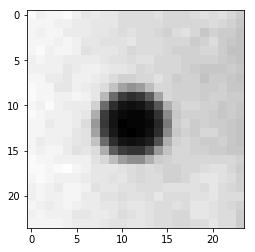

In [4]:
plt.imshow(images[5], cmap=plt.get_cmap('gray'))

[ImageJ](https://imagej.nih.gov/ij/index.html) can also be used to vizualize images stacks (type _Ctrl+C_ then _Auto_ to have a better image contrast).

## Loading the descriptions
Images stack and descriptions file are synchronized: the $i^{th}$ line of descriptions file refers to the $i^{th}$ image.

Descriptions can be loaded using the following function. A list is then created gathering images descriptions. Each element corresponds to the description of an image: several features are provided, namely the ID of the image, the spots number and finally the position of the spots in the image.

In [5]:
# Allow to load the descriptions included in a csv file
## nameFile : the name of the file to read
## all_path : if the file to read isn't in the Data Folder. 
##            In this case, nameFile contains all the path to the file to read
### return the list of the descriptions
def readDescriptions(nameFile, all_path = False):
	descriptions = []
	lines = []
    
	if all_path:
		with open(nameFile, "rb") as my_file:
			reader = csv.reader(my_file , delimiter =";" )
			for line in reader:
				if len(line) == 1 :
					lines.append(line[0].split(","))
				else:
					lines.append(line)

	else:
		with open('Data/' + nameFile, "rb") as my_file:
			reader = csv.reader(my_file , delimiter =";" )
			for line in reader:
				if len(line) == 1 :
					lines.append(line[0].split(","))
				else:
					lines.append(line)

	for i in range(len(lines)):
		cur_line = lines[i]
		cur_description = [i,int(cur_line[1]), float(cur_line[2]), float(cur_line[3]), float(cur_line[4]), float(cur_line[5])]
		descriptions.append(cur_description)

	return descriptions

The description of an image is such as:
1. Index of the image
2. Number of spots on the image
3. X-coordinate of the first spot in  the image
4. Y-coordinate of the first spot in the image
5. X-coordinate of the second spot in the image
6. Y-coordinate of the second spot in the image

There is 0, 1 or 2 spots in one image. The coordinates are set to 0 if there isn't 2 spots in the image. Only spots that are entirely inside the images should be detected. As a result, if the center of the spot is closer than 4 pixels to the image's borders, the spot is ignored. For example, in the image below, only the central spot is considered. The right one isn't entirely inside of the image, thus its detection souldn't be done.


In [6]:
descriptions = readDescriptions("descriptions_results.csv")
print(descriptions[10]) 

[10, 0, 0.0, 0.0, 0.0, 0.0]


Detected spots can be vizualised on images such as:

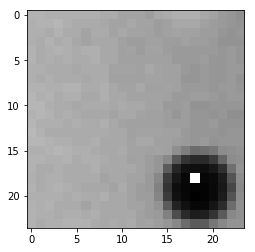

In [7]:
nImage = 4
image_copy = np.copy(images[nImage])
spot = descriptions[nImage][2:4]
image_copy[int(spot[1])][int(spot[0])] = min( np.max(image_copy) + 20, 255)
plt.imshow(image_copy, cmap=plt.get_cmap('gray'))

# Training and prediction
This part is up to you.
You can use anything you want as long as it involves machine learning solutions.

To illustrate our purpose, a fake random solution is proposed in this starting kit.
As a matter, it doesn't require training nor excessif computation time.

First the class of the image is determined by using an integer between 0 and 20 included.
Such repartition is used because, the ratio of images without spot, with one spot and with two spots is approximatively 10/10/1. Finally, spots coordinates are randomly set between 4 and 20 pixels.

In [8]:
def trainPredict(nameFile):
    images = readImages(nameFile)
    # TRAIN: nothing here, it is up to you ;)
    # Predict: random
    answer = []
    for i in range(len(images)):
        nbSpot = random.randint(0,20)
        if nbSpot < 10:
            answer.append([])
        elif nbSpot < 20:
            answer.append([random.random()*16+4,random.random()*16+4])
        elif nbSpot == 20:
            answer.append([random.random()*16+4,random.random()*16+4,random.random()*16+4,random.random()*16+4])
    return answer

# Testing 

During this step, you should use the algorithm you have develop in the training step to create the descriptions of the imageTest stack.
The following function can be used to create your _answers.csv_ file. It takes two arguments:
 1. a list which length should be equal to the number of images in the validation dataset. This list contains the points detected per images. The images shouldn't be sorted in the validation set: the first description must refer to the first image of the stack, the second description must refer to the second image and so on... The $i^{th}$  element of this list should look like:
  * [] if there is no spot in the $i^{th}$ image 
  * [$X,Y$] if there is 1 spot in the $i^{th}$ image
  * [$X_{1},Y_{1},X_{2},Y_{2}$] if there is 2 spots in the $i^{th}$ image<br>
  
  
 2. the filename under which you want to save your answer. For the submission, its name sould be __answers.csv__
    



In [9]:
# Edit the submission file for the answer
## answer: list of the spots on the images
## namFile: the name you want to give to your submission file
def writeDescription(answer, nameFile = 'answers.csv'):
	answer_line =[]
	for i in range(len(answer)):
		cur_answer = [0,0,0,0,0]
		cur_answer[0] = len(answer[i])/2
		if cur_answer[0] > 2:
			print "WARNING TO MANY POINTS DETECTED"
			print "number of points : " + str(cur_answer[0])
			print "number of the image : "+str(i)
			print ("point detected :" + str(answer[i]))
			cur_answer[0] = 2
			answer[i] = answer[i][:4]
		for j in range(len(answer[i])):
			cur_answer[j+1]=answer[i][j]
		answer_line.append(cur_answer)
	with (open(nameFile, "w")) as my_file:
		writer = csv.writer(my_file, delimiter = ';')
		for i in range(len(answer)):
			writer.writerow([i] + answer_line[i] )

Using the above function, an example could be:

In [10]:
test_line = [[12.356,5.75,16.2,16.8],[],[10.47,12.68]]
writeDescription(test_line, "test_answer.csv")

A file *test_answer.csv* should have been created in your main folder, looking like:
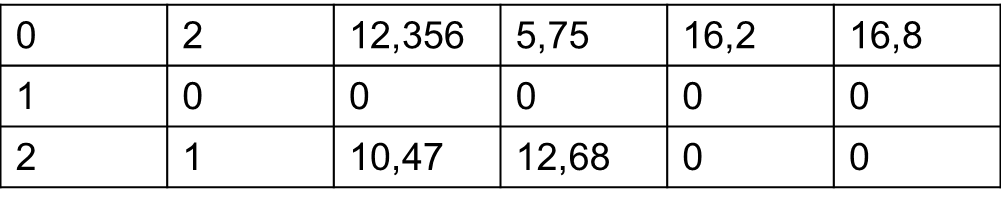

A complete example should be: __todo change the name of the files according to the data in the challenge__

In [11]:
answer = trainPredict("results.tiff")
writeDescription(answer)

## Submission
After creating an *answers.csv* file, create a *.zip* folder of this file and submit it on the CodaLab platform.
__Be carreful, the prediction file you submit must be named answers.csv,__

To submit, you have to follow the procedure on CodaLab.
For more informations, please refer to the [wiki](https://github.com/codalab/codalab-competitions/wiki/User_Participating-in-a-Competition).

The submission_answer.zip provided in the starting kit is an example submission where the class 0 is assigned to every images.

## Scoring
To evaluate your solution, the following metric is used.
Its objective is to evaluate both the class detection and the localization accuracy.
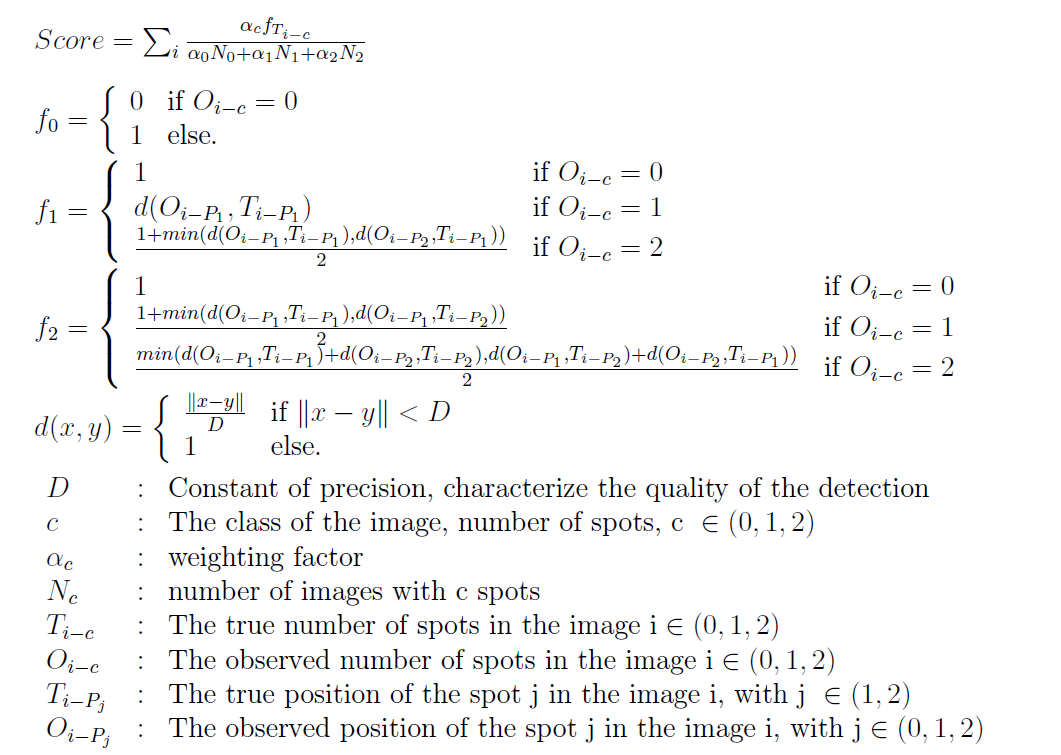

You can find below the implementation of this metric. The $\alpha_{c}$ are chosen in order to approximatively have 20% of score grounded by the images without spot, 50% by the images with one spot and the last 30% by the images with two spots.

In [12]:
# function used to compute the score in the competition
## truth: the correct description of the spots
## observe: the compute description of the spots
def computeScore(truth, observe):
    alpha0 = 21/50.0
    alpha1 = 21/20.0
    alpha2 = 21*3/10
    assert len(truth) == len(observe)
    score = 0
    nb0 = 0
    nb1 = 0
    nb2 = 0
    for i in range(len(truth)):
        try :
            assert len(truth[i])==6
            assert len(observe[i])==6
        except:
            print len(truth[i])
            print len(observe[i])
            print i
            print("ERROR: the format of the file is wrong")
            return 1000000000000
        cur_truth = [int(truth[i][1]), float(truth[i][2]), float(truth[i][3]), float(truth[i][4]), float(truth[i][5])]
        cur_observe = [int(observe[i][1]), float(observe[i][2]), float(observe[i][3]), float(observe[i][4]), float(observe[i][5])]

        if cur_truth[0] == 0:
            score += alpha0 * f0(cur_truth, cur_observe)
            nb0 += 1
        elif cur_truth[0] == 1:
            score += alpha1 * f1(cur_truth, cur_observe)
            nb1 += 1
        elif cur_truth[0] == 2:
            score += alpha2 * f2(cur_truth, cur_observe)
            nb2 += 1
        else :
            score+=1
    return score/ (nb0 * alpha0 + nb1 * alpha1 + nb2 * alpha2)


# function to evaluate the score for image with zero spot
def f0(t, o):
    # print o[0]
    if o[0] == 0:
        return 0
    return 1

# function to evaluate the score for image with one spot
def f1(t,o):
    if o[0] == 0:
        return 1
    if o[0] == 1:
        return d(o[1],o[2],t[1],t[2])
    return ((1 + min(d(o[1], o[2], t[1], t[2]), d(o[3],o[4],t[1],t[2])))/ 2.0)

# function to evaluate the score for image with two spot
def f2(t,o):
    if o[0]==0:
        return 1
    if o[0] == 1:
        return ((1 + min(d(o[1], o[2], t[1], t[2]), d(o[1],o[2],t[3],t[4])))/ 2.0)
    return (min( d(o[1], o[2], t[1], t[2]) + d(o[3], o[4], t[3], t[4]) , d(o[1], o[2], t[3], t[4]) + d(o[3], o[4], t[1], t[2]) )/ 2.0)

# function of distance, evalue the quality of the detection
def d(x1, y1, x2, y2):
    dist = sqrt((x2-x1) * (x2-x1) + (y2-y1)*(y2-y1))
    if dist < 2:
        return ( (dist)/2.0)
    return 1

Here an example of score on the training set:

In [13]:
answer = trainPredict('Imagettes_training.tiff')
truth = readDescriptions("descriptions_training.csv")
writeDescription(answer, "Data/solution_training.csv")
find = readDescriptions("solution_training.csv")
print computeScore(truth, find)

0.896254363607


# Conclusion
With this notebook, you should be fully equiped to complete the competition. As a reminder, you have to implement your machine learning algorithms in the training and prediction part. You are welcome to use various approaches, try to combine methodes, use data augmentation ....

If you have a problem with codalab you can look at their [wiki](https://github.com/codalab/codalab-competitions/wiki)
<br>

You can also discuss issues you have enconter on the forum.__add the link__

If you have some feedbacks you want to give us, you are welcome to put them in the forum __add the link the the discussion__

We hope that you will enjoy doing this challenge.<br> 
Good luck and have fun.